<a href="https://colab.research.google.com/github/drdww/drdww/blob/main/Module1/2_DataTypes_Tables_Wrangling_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tables, Data Wrangling and Statistics
**Dr. Dave Wanik - University of Connecticut - Dept. of Operations and Information Management**

-------------------------------------
Let's get your feet wet with some practical data wrangling! You need to know how to subset rows and columns and calculate some statistics (measure of center like mean, median, mode as well as spread like standard deviation and percentiles.)

# Import Modules
Libraries, modules and functions.

In [ ]:
# import modules
import pandas as pd # for data viz and wrangling
import numpy as np # for 'numeric python'
from pylab import * # for data viz (import * means 'import all of the functions')
                    # and you don't have to write pylab over and over again (like you do for pandas)
                    # this is because different modules/libraries can have the same named functions! and they might do different things...

# Read Data 
We will use `pandas` to read a .csv file that already lives in the `sample_data` folder in Google Colab.

In [ ]:
# read and view some data (using pandas, making a dataframe)
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head(n=5) # shows the first 5 rows in the dataset BY DEFAULT!

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Even though you are just peaking at the first five rows of data, the entire data set is still there in `df`.

# Data Shape
This is important! You ALWAYS need to know how many rows and columns there are.

In [ ]:
df.shape # no round brackets, this is an attribute of the dataframe (ROWS, COLUMNS)

(17000, 9)

## For ease, just keep the first ten rows to analyze...
Looking above, we see that there are 17000 ROWS and 9 COLUMNS. It will always be (ROWS, COLUMNS).

For ease of analysis, let's subset the first 10 rows and use this for analysis. This will help you CHECK YOUR WORK as you go along. So important as a newbie!


In [ ]:
# this will just print them here for inspection
df[0:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


On your own, you can comment this line of code out and it will run for the entire dataframe!!!

In [ ]:
df = df[0:10] # this is actually overwriting the original df variable! No more 17k rows... 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
df.shape # 10 rows, 9 columns

(10, 9)

By the way, do you see how Python counts from 0? 10 things, but counts from 0... 

# Data Types
There are a few different data types in Python (most common are numeric (float); object (categorical); and Boolean (true/false).

In [ ]:
# first method: .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10 non-null     float64
 1   latitude            10 non-null     float64
 2   housing_median_age  10 non-null     float64
 3   total_rooms         10 non-null     float64
 4   total_bedrooms      10 non-null     float64
 5   population          10 non-null     float64
 6   households          10 non-null     float64
 7   median_income       10 non-null     float64
 8   median_house_value  10 non-null     float64
dtypes: float64(9)
memory usage: 848.0 bytes


In [ ]:
# second method: .dtypes
df.dtypes 

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

Note that some functions require round brackets `()` and others don't. When you have round brackets, this is known as a 'first class function' vs. when there are no brackets, this is just an attribute. You'll get the hang of this as you go along. Just try to remember that sometimes you need `()` and sometimes you don't!

# Summary Statistics
If you have numeric data, the `.describe()` function is very useful.

In [ ]:
df.describe() # don't forget the ()! for numeric columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-114.542000,34.000000,26.000000,2832.900000,658.900000,1042.400000,389.700000,2.217910,68300.000000
std,0.089294,0.519145,11.205158,2377.174534,595.440537,858.024242,283.480766,0.647966,13363.299659
min,-114.600000,33.570000,14.000000,720.000000,168.000000,333.000000,117.000000,1.493600,48100.000000
25%,-114.587500,33.615000,17.500000,1403.750000,254.250000,542.250000,229.250000,1.736225,60175.000000
50%,-114.575000,33.665000,22.500000,1499.000000,331.500000,729.000000,266.500000,2.051600,70150.000000
75%,-114.562500,34.347500,32.750000,4318.500000,1051.250000,1100.500000,469.750000,2.555300,78575.000000
max,-114.310000,34.830000,46.000000,7650.000000,1901.000000,3134.000000,1056.000000,3.343800,85700.000000


You can see that you get the count, mean (average), standard deviation, min/max and quartiles (25, 50 and 75th percentile). 



## mean()
The mean is the simple average of all observations.

In [ ]:
# method 1: use numpy to calculate the mean of a column
np.mean(df['housing_median_age'])

26.0

In [ ]:
# method 2: since you have a pandas dataframe, just use pandas!
df['housing_median_age'].mean()

26.0

Which one should you use? Doesn't matter! Both are good. Use the one that makes the most sense to you.

## median()
The median is where 50% of the data lies below this point, and 50% of the data lies above this point. It is the 'midpoint' of the data.

In [ ]:
# method 1: use numpy to calculate the median of a column
np.median(df['housing_median_age'])

22.5

In [ ]:
# method 2: since you have a pandas dataframe, just use pandas!
df['housing_median_age'].median()

22.5

Check your work! All of these values should match the table above.

## quantiles()


For the 25th quantile, this means that 25% of the data lies BELOW this value. The 25th, 50th and 75th quantile are also known as 'quartiles' and are related to the humble boxplot (they split the data into 4... 'quartile' like 'quarter'.) As a refresher, here are the main components of a boxplot.

![components of a boxplot](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)

Now let's try to make a boxplot for `housing_median_age`.

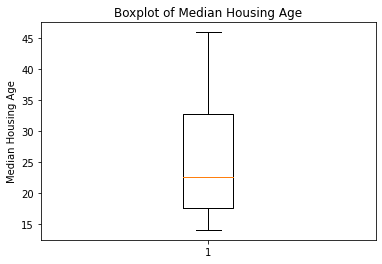

In [ ]:
boxplot(df['housing_median_age'])
ylabel('Median Housing Age')
title('Boxplot of Median Housing Age')
show() # gets rid of the nasty text that comes if you DON'T use this!

And here is how to get the percentiles!

In [ ]:
df['housing_median_age'].quantile([0.25])

0.25    17.5
Name: housing_median_age, dtype: float64

In [ ]:
df['housing_median_age'].quantile([0.50]) # this is the orange line on the boxplot!

0.5    22.5
Name: housing_median_age, dtype: float64

In [ ]:
df['housing_median_age'].quantile([0.75])

0.75    32.75
Name: housing_median_age, dtype: float64

And here is how to get them all at once - the square brackets are a LIST `[]` and they are inside the round brackets `()` of the function.

In [ ]:
df['housing_median_age'].quantile([0.25, 0.50, 0.75])

0.25    17.50
0.50    22.50
0.75    32.75
Name: housing_median_age, dtype: float64

## min() and max()
These are also quantiles... it means that 0% of the data lies below this point (0, min) and 100% of the data lies below this point (100, max).

In [ ]:
# method 1: use .quantile() from pandas
df['housing_median_age'].quantile([0, 1])

0.0    14.0
1.0    46.0
Name: housing_median_age, dtype: float64

In [ ]:
# method 2: use mean or max from pandas
df['housing_median_age'].min()

14.0

In [ ]:
df['housing_median_age'].max()

46.0

In [ ]:
# method 3: use numpy
np.min(df['housing_median_age'])

14.0

In [ ]:
np.max(df['housing_median_age'])

46.0

Again, it may seem a LITTLE overwhelming that there are three ways to do this - but you need to be flexible... it's good to see that there are many ways to return a statistic! Choose one method and run with it. 

# Subsetting (Slicing) Data
As a refresher, here is our dataframe.

In [ ]:
print(df.shape) # (10 rows, 9 columns)
df # prints the dataframe, without a print statement

(10, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


Let's mess around and subset various rows and columns.

## ...select rows using their position

In [ ]:
# select rows 0 through 2 (3 rows in total)
tmp = df[0:3] # [start: up to but not including]
tmp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [ ]:
# select the second row (row 1) through and including the eight row (row 7; 7 rows in total)
tmp = df[1:8] # [start: up to but not including]
print(tmp.shape)
tmp

(7, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0


It is a total mindbender, but this is something you need to master!

## ...select rows based on a condition
Like `housing_median_age` is greater than some value...

In [ ]:
tmp = df[df['housing_median_age'] > 22]
tmp # check your work... looks good!

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


By default, all columns are returned. Next we will look at selecting just columns (and all rows), and then later, selecting rows and columns based on values in a column.

# Selecting Columns

## ...with specific column names

In [ ]:
tmp = df[['housing_median_age', 'total_rooms']]
tmp

,housing_median_age,total_rooms
0,15.0,5612.0
1,19.0,7650.0
2,17.0,720.0
3,14.0,1501.0
4,20.0,1454.0
5,29.0,1387.0
6,25.0,2907.0
7,41.0,812.0
8,34.0,4789.0
9,46.0,1497.0


In [ ]:
tmp.shape

(10, 2)

## ...using .loc(), with a range of columns...
Notice the use of `:` for returning all rows, and for column names, notice how it returns everything though and including the start/end point...

In [ ]:
# method: only requires on set of square brackets
tmp = df.loc[:, 'housing_median_age':'total_bedrooms']
tmp

,housing_median_age,total_rooms,total_bedrooms
0,15.0,5612.0,1283.0
1,19.0,7650.0,1901.0
2,17.0,720.0,174.0
3,14.0,1501.0,337.0
4,20.0,1454.0,326.0
5,29.0,1387.0,236.0
6,25.0,2907.0,680.0
7,41.0,812.0,168.0
8,34.0,4789.0,1175.0
9,46.0,1497.0,309.0


In [ ]:
# method: requires a nested list as an argument
tmp = df.loc[:, ['housing_median_age', 'total_rooms', 'total_bedrooms']]
tmp

,housing_median_age,total_rooms,total_bedrooms
0,15.0,5612.0,1283.0
1,19.0,7650.0,1901.0
2,17.0,720.0,174.0
3,14.0,1501.0,337.0
4,20.0,1454.0,326.0
5,29.0,1387.0,236.0
6,25.0,2907.0,680.0
7,41.0,812.0,168.0
8,34.0,4789.0,1175.0
9,46.0,1497.0,309.0


## ... with .iloc() 
When you think `.iloc()`, think INTEGER LOCATION - so you need to use position arguments and not the column names.

In [ ]:
tmp = df.iloc[:, 2:4] # careful! does not include the end point!
tmp

,housing_median_age,total_rooms
0,15.0,5612.0
1,19.0,7650.0
2,17.0,720.0
3,14.0,1501.0
4,20.0,1454.0
5,29.0,1387.0
6,25.0,2907.0
7,41.0,812.0
8,34.0,4789.0
9,46.0,1497.0


In [ ]:
# method: with a list as an argument
tmp = df.iloc[:, [2,3,4]] # but since this is a list, it DOES include the endpoint
tmp

,housing_median_age,total_rooms,total_bedrooms
0,15.0,5612.0,1283.0
1,19.0,7650.0,1901.0
2,17.0,720.0,174.0
3,14.0,1501.0,337.0
4,20.0,1454.0,326.0
5,29.0,1387.0,236.0
6,25.0,2907.0,680.0
7,41.0,812.0,168.0
8,34.0,4789.0,1175.0
9,46.0,1497.0,309.0


# Selecting Rows and Columns
Instead of just selecting ALL ROWS when we are selecting columns, as we did above - let's try to select ranges or specific rows.

In [ ]:
# one range and one list as arguments to the function!
tmp = df.iloc[1:4, [2,3,4,5]]
tmp

,housing_median_age,total_rooms,total_bedrooms,population
1,19.0,7650.0,1901.0,1129.0
2,17.0,720.0,174.0,333.0
3,14.0,1501.0,337.0,515.0


In [ ]:
# two lists as arguments to the function!
tmp = df.iloc[[1,2,3], [2,3,4,5]]
tmp

,housing_median_age,total_rooms,total_bedrooms,population
1,19.0,7650.0,1901.0,1129.0
2,17.0,720.0,174.0,333.0
3,14.0,1501.0,337.0,515.0


# Selecting Rows and Columns Based on a Condition

In [ ]:
# refresh on what df looks like
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
# select all rows where housing_median_age is greater than 20
tmp = df[df['housing_median_age'] > 20] 
tmp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [ ]:
# select all rows where `population` is less than or equal to 1000
tmp = df[df['population'] <= 1000]
tmp 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


# And vs. Or 
In my experience, you typically are returning ALL ROWS based on values in a column(s). Here are some examples of that.

## & (and)

In [ ]:
# select rows where where `population` is less than or equal to 1000 
# AND housing_median_age is greater than 20
tmp = df[(df['population'] <= 1000) & (df['housing_median_age'] > 20)]
tmp 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


On your own, can you add other conditions?

## | (or)

In [ ]:
# select rows where where `population` is less than or equal to 1000 
# OR housing_median_age is greater than 20
tmp = df[(df['population'] <= 1000) | (df['housing_median_age'] > 20)]
tmp 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


On your own, can you try to add an (&) to this?

# Advanced wrangling and statistics
Put everything you've learned into practice! This is a tougher formulation of the problem - can you extract the 90th percentile of `median_income` when `population` is less than or equal to 1000 and `housing_median_age` is greater than 20?

In [ ]:
tmp = df[(df['population'] <= 1000) | (df['housing_median_age'] > 20)]
tmp['median_income'].quantile([0.9]) # this just prints the value - did not assign!

0.9    3.23733
Name: median_income, dtype: float64

It's OK to use 2 lines of code! In fact, it's probably preferable so you can see what someone else did.

# GroupBy
Here is an example of groupby! 

In [ ]:
# first, we need a grouping column, so let's make one!
df['FLAG_housing_median_age'] = np.where(df['housing_median_age'] > 20,
                                         1, # if true
                                         0) # otherwise, if false...)
# check your work!
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,FLAG_housing_median_age
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,1
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,1
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,1
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,1
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,1


In [ ]:
# how many rows per unique value?
df['FLAG_housing_median_age'].value_counts()

1    5
0    5
Name: FLAG_housing_median_age, dtype: int64

In [ ]:
# rows, columns
df.shape

(10, 10)

In [ ]:
# pandas grouby
# take the mean per group across ALL COLUMNS
# link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
df.groupby(["FLAG_housing_median_age"]).mean() # take mean of all columns by FLAG

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
FLAG_housing_median_age,,,,,,,,,
0,-114.496,33.898,17.0,3387.4,804.2,723.2,308.0,2.01624,74320.0
1,-114.588,34.102,35.0,2278.4,513.6,1361.6,471.4,2.41958,62280.0


In [ ]:
# take the mean per group for just ONE column
# df.groupby(["GROUPING VARIABLE 1", 'GROUPING VARIABLE 2'])['NUMERIC COLUMN'].mean()
df.groupby(["FLAG_housing_median_age"])['median_house_value'].mean()

FLAG_housing_median_age
0    74320.0
1    62280.0
Name: median_house_value, dtype: float64